In [16]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from sklearn import tree

In [17]:
R = pd.read_csv('realAccountData.csv')
R.shape

(994, 9)

In [18]:
F = pd.read_csv('fakeAccountData.csv')
F.shape

(200, 9)

In [19]:
R.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0


In [20]:
F.head()

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,25,1937,0,0,1,1,0,10,1
1,324,4122,0,0,1,0,4,15,1
2,15,399,0,0,0,0,3,12,1
3,14,107,0,1,1,0,1,10,1
4,264,4651,0,0,1,0,0,14,1


In [21]:
R1 = R.dropna()
R1.shape

(994, 9)

observation1: there are no null values in realAccountData.csv

In [22]:
F1 = F.dropna()
F1.shape

(200, 9)

observation2: there are no null values in fakeAccountData.csv

In [23]:
R.dtypes

userFollowerCount      int64
userFollowingCount     int64
userBiographyLength    int64
userMediaCount         int64
userHasProfilPic       int64
userIsPrivate          int64
usernameDigitCount     int64
usernameLength         int64
isFake                 int64
dtype: object

In [24]:
F.dtypes

userFollowerCount      int64
userFollowingCount     int64
userBiographyLength    int64
userMediaCount         int64
userHasProfilPic       int64
userIsPrivate          int64
usernameDigitCount     int64
usernameLength         int64
isFake                 int64
dtype: object

appending into single dataset

In [25]:
pd.concat([R, F]).to_csv('AccountData.csv', index=False)

Splitting data for Training and Testing purpose in 80:20 ratio:

In [26]:
acc_data = pd.read_csv('AccountData.csv')
X = acc_data.drop(['isFake'],1) #input variables
Y = acc_data['isFake'] #target variable

<ipython-input-26-8d4b56dd9cae>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = acc_data.drop(['isFake'],1) #input variables


In [27]:
X.shape

(1194, 8)

In [28]:
Y.shape

(1194,)

Splitting data for Training and Testing purpose in 80:20 ratio:

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X, Y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
        
                'C': [0.1, 1, 10, 100],
                'fit_intercept': [True, False]
            }
        },
        'decision_tree-Regression': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 
                'max_depth': [None, 5, 10, 15]
            }
        },
       'decision_tree-Classification': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini','entropy'], 
                'max_depth': [None, 5, 10, 15]
            }
        },
        
        'svm': {
            'model': SVC(),
            'params': {
                'C': [0.1, 1, 10, 100],
                'gamma': [0.001, 0.01, 0.1, 1],
                
            }
        }
    }
    
    results = []
    
    for algo_name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        gs.fit(X, Y)
        

        y_pred = gs.predict(X)
        accuracy = accuracy_score(Y, y_pred.round())
        precision = precision_score(Y, y_pred.round(),average='micro'),
        recall = recall_score(Y, y_pred.round(),average='micro')
        f1 = f1_score(Y, y_pred.round(),average='micro')
        
        results.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

    return pd.DataFrame(results, columns=['model', 'best_score', 'best_params', 'accuracy', 'precision', 'recall', 'f1_score'])

find_best_model_using_gridsearchcv(X_train, Y_train)


,model,best_score,best_params,accuracy,precision,recall,f1_score
0,logistic_regression,0.941361,"{'C': 10, 'fit_intercept': True}",0.949738,"(0.949738219895288,)",0.949738,0.949738
1,decision_tree-Regression,0.746469,"{'criterion': 'poisson', 'max_depth': None}",0.981152,"(0.981151832460733,)",0.981152,0.981152
2,decision_tree-Classification,0.951832,"{'criterion': 'gini', 'max_depth': 5}",0.984293,"(0.9842931937172775,)",0.984293,0.984293
3,svm,0.884817,"{'C': 10, 'gamma': 0.001}",0.994764,"(0.9947643979057592,)",0.994764,0.994764


testing DT with X_test and Y_test

In [52]:
dt_obj =DecisionTreeClassifier(random_state=1)
dt_obj.fit(X_train,Y_train)
print('Train score RF:',dt_obj.score(X_train,Y_train))
print('Test Score DT:',dt_obj.score(X_test,Y_test))

Train score RF: 1.0
Test Score DT: 0.9497907949790795


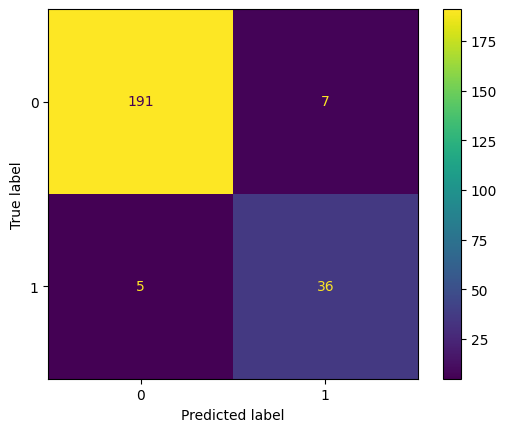

In [53]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_actual = Y_test
y_predicted = dt_obj.predict(X_test)

cm=confusion_matrix(y_actual,y_predicted)

disp = ConfusionMatrixDisplay(cm,display_labels=dt_obj.classes_)
disp.plot()
plt.show()

testing SVM with X_test and Y_test

In [54]:
svm_obj =svm.SVC(random_state=1)
svm_obj.fit(X_train,Y_train)
print('Test Score SVM:',svm_obj.score(X_train,Y_train))
print('Test Score SVM:',svm_obj.score(X_test,Y_test))

Test Score SVM: 0.9319371727748691
Test Score SVM: 0.9079497907949791


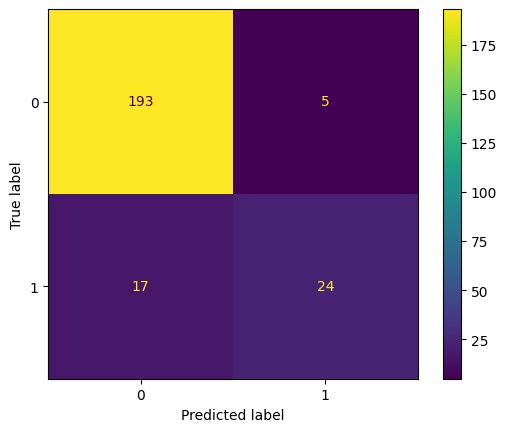

In [55]:

from sklearn.metrics import f1_score
y_actual = Y_test
y_predicted = svm_obj.predict(X_test)

cm=confusion_matrix(y_actual,y_predicted)

disp = ConfusionMatrixDisplay(cm,display_labels=svm_obj.classes_)
disp.plot()
plt.show()

cross validation score

In [58]:
from sklearn.model_selection import cross_val_score,ShuffleSplit

# Define the number of splits and the test set size for cross-validation
cv = ShuffleSplit(n_splits=5, test_size=0.2)

# Perform cross-validation using the cross_val_score method
cross_val_score(DecisionTreeClassifier(random_state=0), X_test, Y_test, cv=cv)

array([0.91666667, 0.875     , 0.95833333, 0.9375    , 0.875     ])

In [59]:
cv = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(svm.SVC(random_state=0), X_test, Y_test, cv=cv)

array([0.9375    , 0.91666667, 0.85416667, 0.85416667, 0.875     ])

Manual test case:

In [60]:
# create a new DataFrame with the same column names as the training data
new_data = pd.DataFrame(columns=['userFollowerCount','userFollowingCount','userBiographyLength',
                                 'userMediaCount','userHasProfilPic','userIsPrivate',
                                 'usernameDigitCount','usernameLength'])

# add a row to the DataFrame 
new_data.loc[0] = [35, 1000, 17, 0, 0, 1, 2, 22]


In [61]:
y = dt_obj.predict(new_data)

if y==1:
  print("it is a fake account")
elif y==0:
  print("it is a real account") 
   
y

it is a fake account


array([1])

In [62]:
y = svm_obj.predict(new_data)

if y==1:
  print("it is a fake account")
elif y==0:
  print("it is a real account") 

  
y  

it is a fake account


array([1])